# Import Needed Libraries

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
#loading dataset
import pandas as pd
import numpy as np
!pip install ann-visualizer
#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
#EDA
from collections import Counter
from sklearn.model_selection import GridSearchCV
# data preprocessing
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report,roc_auc_score
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for ann-visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4168 sha256=df5e0bd44241cbf7585caab0459ac171e7539249d803d213549e7846ca157409
  Stored in directory: /root/.cache/pip/wheels/1b/fc/58/2ab1c3b30350105929308becddda4fb59b1358e54f985e1f4a
Successfully built ann-visualizer


# Import Dataset

In [ ]:
data = pd.read_csv("/content/gdrive/MyDrive/Helwan Research/helwan/task1/output/balabit_features_test.csv")
data.head()

,type_of_action,traveled_distance_pixel,elapsed_time,direction_of_movement,straightness,num_points,sum_of_angles,mean_curv,sd_curv,max_curv,...,mean_jerk,sd_jerk,max_jerk,min_jerk,a_beg_time,class,session,n_from,n_to,islegal
0,3,558.805118,0.400370,7,0.980327,27,-7.046386,-0.004921,0.624290,1.666081,...,-1.963971e+05,1.376892e+07,2.814658e+07,-4.157193e+07,0.064562,7,1,2,29,1
1,3,976.950359,1.282208,0,0.658132,111,10.499030,0.002347,0.148174,0.588003,...,2.753783e+06,3.257510e+07,3.287133e+08,-3.698559e+07,0.029998,7,1,30,141,1
2,1,167.307545,0.408806,1,0.979739,39,54.177452,0.045099,0.119415,1.570796,...,-5.745833e+04,6.494398e+06,1.801812e+07,-1.394264e+07,0.023988,7,1,142,180,1
3,4,1510.505310,1.407351,3,0.761292,108,208.457303,-0.011033,0.235039,1.570796,...,-1.729956e+04,6.454564e+06,2.152297e+07,-2.189360e+07,0.111485,7,1,181,288,1
4,1,978.788598,1.696083,7,0.986177,89,-1.136185,-0.012861,0.237535,0.785398,...,5.422200e+04,8.908447e+06,2.779096e+07,-3.236823e+07,0.079967,7,1,289,377,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 632 entries, 0 to 631
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   type_of_action           632 non-null    int64  
 1   traveled_distance_pixel  632 non-null    float64
 2   elapsed_time             632 non-null    float64
 3   direction_of_movement    632 non-null    int64  
 4   straightness             632 non-null    float64
 5   num_points               632 non-null    int64  
 6   sum_of_angles            632 non-null    float64
 7   mean_curv                632 non-null    float64
 8   sd_curv                  632 non-null    float64
 9   max_curv                 632 non-null    float64
 10  min_curv                 632 non-null    float64
 11  mean_omega               632 non-null    float64
 12  sd_omega                 632 non-null    float64
 13  max_omega                632 non-null    float64
 14  min_omega                6

In [ ]:
list = [' islegal','class','session','n_from','n_to']
x = data.drop(list,axis = 1 )
y = data[' islegal']

Number of Not Correct:  331
Number of Correct :  301


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


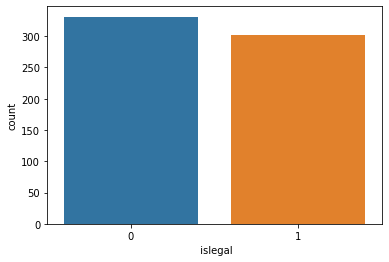

In [ ]:
ax = sn.countplot(y,label="Count")       # M = 212, B = 357
B, M = y.value_counts()
print('Number of Not Correct: ',B)
print('Number of Correct : ',M)

In [ ]:
x.describe()

,type_of_action,traveled_distance_pixel,elapsed_time,direction_of_movement,straightness,num_points,sum_of_angles,mean_curv,sd_curv,max_curv,...,min_v,mean_a,sd_a,max_a,min_a,mean_jerk,sd_jerk,max_jerk,min_jerk,a_beg_time
count,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,...,632.000000,632.000000,6.320000e+02,6.320000e+02,6.320000e+02,6.320000e+02,6.320000e+02,6.320000e+02,6.320000e+02,632.000000
mean,2.634494,828.301383,1.156402,3.405063,0.835422,80.428797,40.012793,0.018291,0.413508,2.103582,...,15.330655,4707.517957,7.080762e+04,3.063747e+05,-1.560648e+05,1.356643e+06,3.202257e+07,1.528023e+08,-9.161747e+07,0.067045
std,1.309824,576.539496,0.884117,2.321369,0.206214,51.550551,94.675144,0.056684,0.401901,1.737462,...,40.209576,31460.404805,2.264144e+05,1.427288e+06,2.141447e+05,1.932837e+07,3.115383e+08,1.414470e+09,1.270090e+09,0.112282
min,1.000000,3.000000,0.088949,0.000000,0.049113,5.000000,-236.730650,-0.293561,0.000000,0.000000,...,0.000000,-877.711063,3.285622e+03,7.828790e+03,-3.170341e+06,-1.672194e+08,2.737525e+05,6.286532e+05,-3.159684e+10,0.000000
25%,1.000000,291.499008,0.550767,2.000000,0.759952,44.000000,-16.121424,-0.004458,0.153992,0.785398,...,0.000000,786.746663,3.139873e+04,8.566609e+04,-1.720210e+05,-4.911711e+04,5.476383e+06,1.265900e+07,-3.011880e+07,0.015898
50%,3.000000,875.487628,0.866148,3.000000,0.926514,68.000000,27.558125,0.011022,0.286450,1.570796,...,0.000000,1199.456143,4.049597e+04,1.250042e+05,-1.072804e+05,1.477916e+04,6.516022e+06,1.819494e+07,-1.922720e+07,0.039978
75%,4.000000,1196.089806,1.569890,5.000000,0.980291,107.250000,86.583412,0.032863,0.579243,3.141593,...,11.523587,1980.626146,5.875216e+04,2.048801e+05,-7.295399e+04,7.289593e+04,8.782510e+06,2.745220e+07,-1.369436e+07,0.096839
max,4.000000,5909.268021,7.455695,7.000000,1.000000,474.000000,461.034629,0.523599,5.151007,6.038207,...,375.228485,613427.632777,4.383596e+06,2.560455e+07,2.212336e+02,3.401169e+08,6.976224e+09,2.563438e+10,2.767064e+03,2.367781


In [ ]:
x.head()

,type_of_action,traveled_distance_pixel,elapsed_time,direction_of_movement,straightness,num_points,sum_of_angles,mean_curv,sd_curv,max_curv,...,min_v,mean_a,sd_a,max_a,min_a,mean_jerk,sd_jerk,max_jerk,min_jerk,a_beg_time
0,3,558.805118,0.400370,7,0.980327,27,-7.046386,-0.004921,0.624290,1.666081,...,15.634171,1754.775880,94557.636247,232224.011342,-244737.544822,-1.963971e+05,1.376892e+07,2.814658e+07,-4.157193e+07,0.064562
1,3,976.950359,1.282208,0,0.658132,111,10.499030,0.002347,0.148174,0.588003,...,0.000000,4386.385266,64684.769642,483940.393123,-98366.799901,2.753783e+06,3.257510e+07,3.287133e+08,-3.698559e+07,0.029998
2,1,167.307545,0.408806,1,0.979739,39,54.177452,0.045099,0.119415,1.570796,...,17.709291,1545.025465,32331.609265,77932.729748,-52015.398277,-5.745833e+04,6.494398e+06,1.801812e+07,-1.394264e+07,0.023988
3,4,1510.505310,1.407351,3,0.761292,108,208.457303,-0.011033,0.235039,1.570796,...,0.000000,255.568885,39426.968531,109796.001928,-157743.126845,-1.729956e+04,6.454564e+06,2.152297e+07,-2.189360e+07,0.111485
4,1,978.788598,1.696083,7,0.986177,89,-1.136185,-0.012861,0.237535,0.785398,...,3.117063,1666.138645,54154.599036,198224.395889,-199131.794464,5.422200e+04,8.908447e+06,2.779096e+07,-3.236823e+07,0.079967


In [ ]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sn.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [ ]:
upper_tri = x.corr().where(np.triu(np.ones(x.corr().shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(to_drop)
x_1 = x.drop(to_drop,axis = 1 )        # do not modify x, we will use it later 
x_1.head()

In [ ]:
#correlation map
f,ax = plt.subplots(figsize=(14, 14))
sn.heatmap(x_1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [ ]:
x_1.columns

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(x_1, y, test_size=0.30, random_state = 0)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
m7 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=5)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
svc_predictedtrain = svc.predict(X_train)
svc_acc_scoretrain = accuracy_score(y_train, svc_predictedtrain)

plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = sn.heatmap(svc_conf_matrix, cmap="Greens", annot=True, fmt='d', xticklabels= [ 'Malignant','Benign'],
                yticklabels=['Malignant', 'Benign'])
plt.title('Breast Cancer Diagnosis')
plt.xlabel('Prediction')
plt.ylabel('Truth')
# plt.subplots(figsize=(9, 6))
plt.show(ax)
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print("Accuracy of Support Vector Classifier in training set:",svc_acc_scoretrain*100,'\n')

print(classification_report(y_test,svc_predicted))

In [ ]:
m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = sn.heatmap(nb_conf_matrix, cmap="Greens", annot=True, fmt='d', xticklabels= [ 'Malignant','Benign'],
                yticklabels=['Malignant', 'Benign'])
plt.title('Breast Cancer Diagnosis')
plt.xlabel('Prediction')
plt.ylabel('Truth')
# plt.subplots(figsize=(9, 6))
plt.show(ax)
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint_callback = ModelCheckpoint(
    "ANN.h5", monitor='val_accuracy', verbose=1,
    save_best_only=True, save_weights_only=False,
    save_frequency=1)

model = Sequential()
model.add(Dense(64, input_shape=(33,), activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(612, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
    

    
model.summary()
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
epochs = 100
history = model.fit(X_train,y_train,epochs=100,callbacks=[checkpoint_callback],validation_data=(X_test,y_test))
test_loss,test_accuracy = model.evaluate(X_test,y_test)
model

In [ ]:
from tensorflow import keras
model.summary()
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model = Sequential()
model.add(Dense(64, input_shape=(33,), activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(612, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
    
model.load_weights('ANN.h5')
predict = model.predict(X_test)
for i in range(len(predict)):
    if(predict[i]>0.5):
        predict[i]=1
    else:
        predict[i]=0


conf_arr = confusion_matrix(y_test, predict)

plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = sn.heatmap(conf_arr, cmap="Greens", annot=True, fmt='d', xticklabels= [ 'Malignant','Benign'],
                yticklabels=['Malignant', 'Benign'])
plt.title('Breast Cancer Diagnosis')
plt.xlabel('Prediction')
plt.ylabel('Truth')
# plt.subplots(figsize=(9, 6))
plt.show(ax)
print(classification_report(y_test,predict))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
test_loss,test_accuracy = model.evaluate(X_test,y_test)

In [ ]:
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)

plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = sn.heatmap(lr_conf_matrix, cmap="Greens", annot=True, fmt='d', xticklabels= [ 'Malignant','Benign'],
                yticklabels=['Malignant', 'Benign'])
plt.title('Breast Cancer Diagnosis')
plt.xlabel('Prediction')
plt.ylabel('Truth')
# plt.subplots(figsize=(9, 6))
plt.show(ax)
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

In [ ]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=1600, random_state=0,max_depth=9)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = sn.heatmap(rf_conf_matrix, cmap="Greens", annot=True, fmt='d', xticklabels= [ 'Malignant','Benign'],
                yticklabels=['Malignant', 'Benign'])
plt.title('Breast Cancer Diagnosis')
plt.xlabel('Prediction')
plt.ylabel('Truth')
# plt.subplots(figsize=(9, 6))
plt.show(ax)
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))


In [ ]:
#create new a knn model
knn2 = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 15)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=3)
#fit model to data
knn_gscv.fit(x, y)
#check top performing n_neighbors value
print(knn_gscv.best_params_)
print(knn_gscv.best_score_)

m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = sn.heatmap(knn_conf_matrix, cmap="Greens", annot=True, fmt='d', xticklabels= [ 'Malignant','Benign'],
                yticklabels=['Malignant', 'Benign'])
plt.title('Breast Cancer Diagnosis')
plt.xlabel('Prediction')
plt.ylabel('Truth')
# plt.subplots(figsize=(9, 6))
plt.show(ax)
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

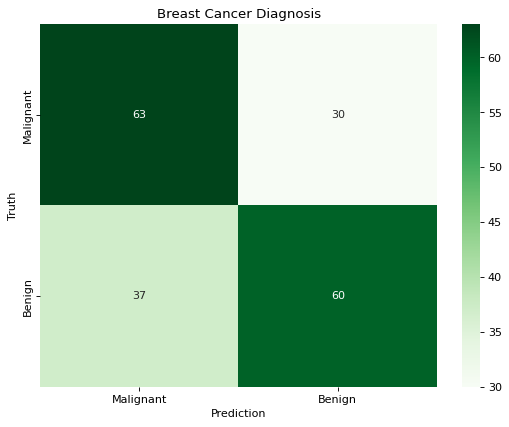

Accuracy of DecisionTreeClassifier: 64.73684210526316 

              precision    recall  f1-score   support

           0       0.63      0.68      0.65        93
           1       0.67      0.62      0.64        97

    accuracy                           0.65       190
   macro avg       0.65      0.65      0.65       190
weighted avg       0.65      0.65      0.65       190

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


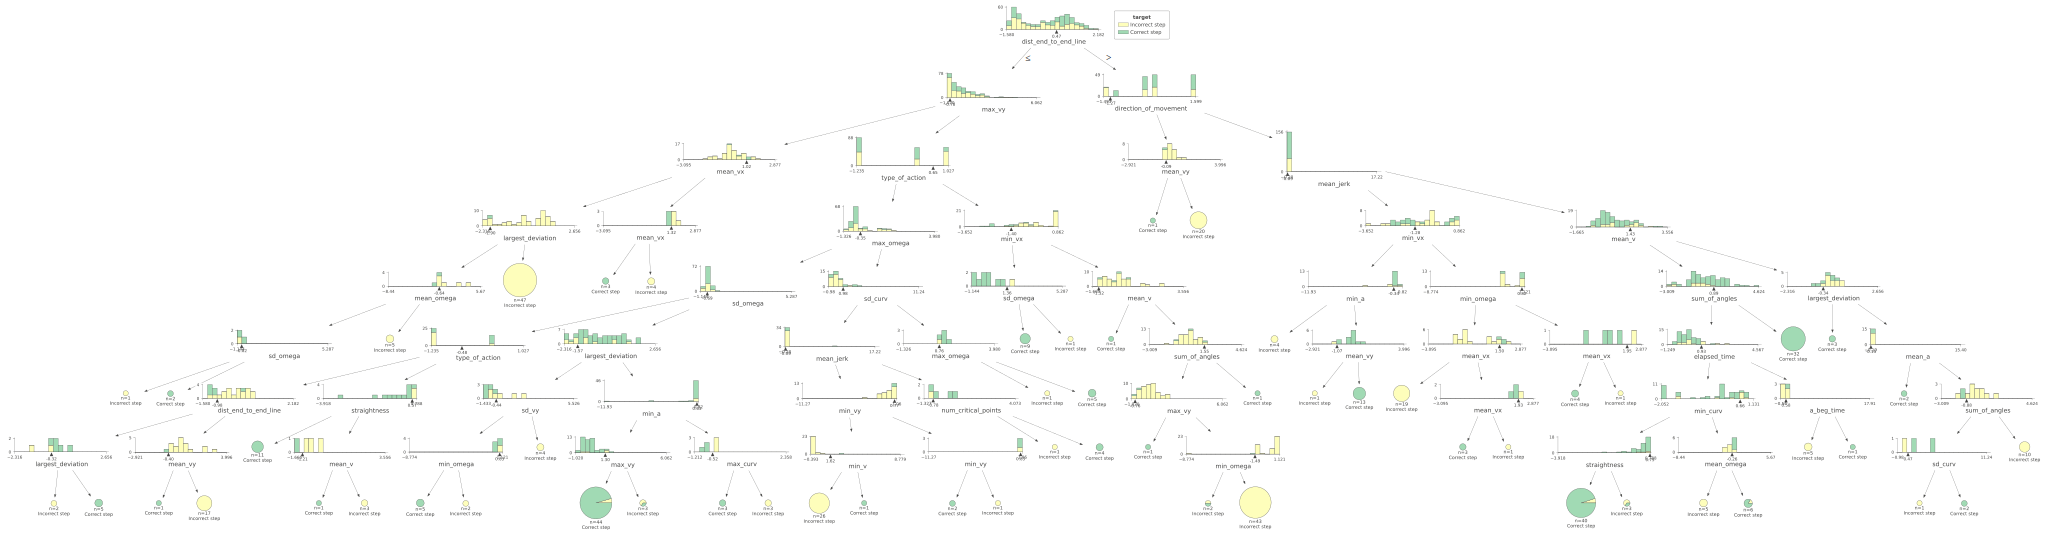

In [ ]:
m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'gini',random_state=0,max_depth = 8)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = sn.heatmap(dt_conf_matrix, cmap="Greens", annot=True, fmt='d', xticklabels= [ 'Malignant','Benign'],
                yticklabels=['Malignant', 'Benign'])
plt.title('Breast Cancer Diagnosis')
plt.xlabel('Prediction')
plt.ylabel('Truth')
# plt.subplots(figsize=(9, 6))
plt.show(ax)
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))
import graphviz
# DOT data
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
!pip install dtreeviz
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(dt, X_train, y_train,
                target_name="target",
                feature_names=x_1.columns,  
                                class_names=['Incorrect step','Correct step'])

viz
viz.save(r"C:\Users\lap technology\Downloads\helwan fid\decision_tree.svg")


In [ ]:
viz

In [ ]:
dnn_false_positive_rate,dnn_true_positive_rate,svc_threshold = roc_curve(y_test,predict)
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,nbpred)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_predicted)                                                             
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,knn_predicted)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_predicted)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svc_predicted)


sn.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(dnn_false_positive_rate,dnn_true_positive_rate,label='Deep Neural Network')
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

In [ ]:
model_ev = pd.DataFrame({'Model': ['Deep Neural Network','Naive Bayes','Random Forest',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine'], 'Accuracy': [test_accuracy*100,
                    nb_acc_score*100,rf_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100]})
model_ev

In [ ]:
colors = ['red','green','blue','gold','silver','yellow','orange',]
plt.figure(figsize=(20,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()